<a href="https://colab.research.google.com/github/jrangelg/Artificial-intelligence/blob/main/Potencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Potencia del test para una muestra de Poisson

Supongamos que tenemos una muestra aleatoria $X_1, X_2, \dots, X_n$ de variables independientes e idénticamente distribuidas, donde cada $X_i \sim \text{Poisson}(\theta)$. Queremos contrastar la hipótesis:

$$
H_0: \theta = \theta_0 \quad \text{vs} \quad H_1: \theta > \theta_0
$$

La **estadística de prueba** natural en este caso es:

$$
T = \sum_{i=1}^{n} X_i
$$

Bajo $H_0$, $T \sim \text{Poisson}(n\theta_0)$, ya que la suma de variables Poisson independientes con el mismo parámetro es también Poisson con parámetro igual a la suma de los parámetros individuales.

#### Regla de decisión

Rechazamos $H_0$ si:

$$
T > c
$$

donde $c$ es el cuantil $1 - \alpha$ de la distribución $\text{Poisson}(n\theta_0)$, es decir, $c$ se elige tal que:

$$
P_{H_0}(T > c) \leq \alpha
$$

#### Definición de potencia

La **potencia** del test para un valor dado de $\theta_1 > \theta_0$ es la probabilidad de rechazar $H_0$ cuando en realidad $\theta = \theta_1$:

$$
\text{Potencia}(\theta_1) = P_{H_1}(T > c) = P\left(\sum_{i=1}^{n} X_i > c \;\middle|\; \theta = \theta_1 \right)
$$

Cuanto mayor sea la distancia entre $\theta_1$ y $\theta_0$, mayor será la potencia. Esta se aproxima a 1 conforme $\theta_1 \to \infty$, y es igual a $\alpha$ cuando $\theta_1 = \theta_0$.

#### Objetivo de la simulación

En este experimento simulamos muestras bajo distintos valores de $\theta_1$, y para cada uno calculamos empíricamente la potencia como la proporción de veces que se rechaza $H_0$. Esto permite construir la **curva de potencia**, que representa gráficamente la eficacia del test para detectar desvíos respecto de $\theta_0$.




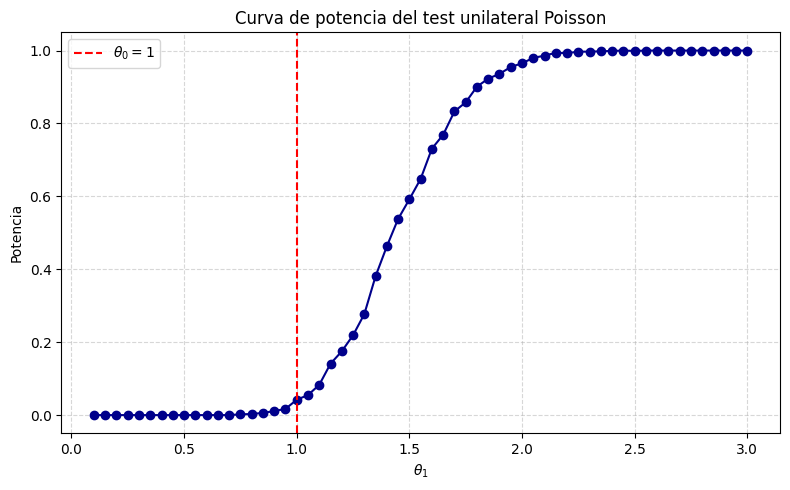

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parámetros del test
theta_0 = 1           # valor bajo la hipótesis nula
n = 20                # tamaño de la muestra
alpha = 0.05          # nivel de significancia
reps = 1000           # repeticiones de la simulación

# Umbral crítico para la suma de X bajo H0: X ~ Poisson(n * theta_0)
critical_value = poisson.ppf(1 - alpha, mu=n * theta_0)

# Vector de valores de theta_1 bajo la alternativa
theta_alternativas = np.arange(0.1, 3.05, 0.05)
potencias = []

# Simulación de la potencia para cada valor de theta_1
for theta_1 in theta_alternativas:
    # Generar 'reps' sumas de muestras de tamaño n con media theta_1
    muestras = np.random.poisson(lam=theta_1, size=(reps, n))
    sumas_muestras = muestras.sum(axis=1)

    # Calcular proporción de rechazos: potencia
    rechazos = np.mean(sumas_muestras > critical_value)
    potencias.append(rechazos)

# Graficar la curva de potencia
plt.figure(figsize=(8, 5))
plt.plot(theta_alternativas, potencias, marker='o', color='darkblue')
plt.axvline(x=theta_0, color='red', linestyle='--', label=r'$\theta_0 = 1$')
plt.title('Curva de potencia del test unilateral Poisson')
plt.xlabel(r'$\theta_1$')
plt.ylabel('Potencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
